In [79]:
import torch
import torchvision 
import cv2 

In [80]:
print(torch.__version__)
print(torchvision.__version__)


1.1.0.dev20190517
0.2.3


<h1><i>CONVOLUTIONAL NEURAL NETWORKS</h1>

<h3><i>USES</i></h3>
<i>
1. Used in most vision problems , like recognition , detection , segmentation , classification
 </i>
 <i>This helps to preserve spatial structure . This process (convolution) helps in feature extraction , which can be further given to other models for usage .Ex : <strong>Neural Style Transfer 
 

<i>The best analogy is that there is a torch(kernel) and a photo(feature map) : The torch will only show light on a 
    particular part of the image . So there is information only local to the region that matters</i>
    
                   

<img src="conv.png" width=500 height=700>

<i><Strong>FILTER</Strong> : A filter is a matrix of size H<sub>1</sub> W<sub>1</sub> D<sub>1</sub> <br>
<strong>ORIGINAL MATRIX </strong> : Is also a matrix , of size H<sub>2</sub> W<sub>2</sub> D<sub>2</sub>
    
The kernel will be multiplied to each of the possible (required) squares of the same size in the Original image and this leads to getting the most spiked representation in that particular area . Here the weights are small filters .
<br>
<Strong>Slide the filter across a feature map and the result of this operation is also a feature map
    <br>
    Get the final feature map by stacking all the activation maps provided by each of the filters .

<b>Normal architecture :
<pre>
          Conv                Conv
32*32*32--ReLU----->28*28*1---ReLU---->activation map

ReLU--->pool--->fc--->softmax_output

</pre>


<h2><i>SIZES</h2>
<i> <pre>
1. (n-f)/stride +1 :
n :  size of the feature map
f :  Size of the filter 
stride : this is a hyperparameter  that says  by how much should the filter be moved while convolving.

Padding : This is used to preserve the size of the feature map.In this process , the borders are padded with zeros 
Padding has to be done so that the network size doesn't reduce rapidly .If this happens then there wont be much help . Padding helps in smooth transition of the size  .

SIZE_beginning =======>SIZE_SMALL                            [not good]
SIZE_beginning============>medium==========>small            [good]


Padding number  : (f-1)/2
 volume of size w*h*d where 
	w = feature_map(w) - f + 2 (padding) /s+1
	h = feature_map(h) -f + 2 (padding)/ s+1
	d = no of filters
    
    
    1X1 conv is a dot product over the entire map
    
    Total number of parameters is calculated by multiplying the
    (size of the kernel +1)X(no of multiplications)
</pre>

Alex-Net : architecture .First to use CNN for ImageNet challenge 2012
<img src="AlexNet-1.png" width=600 height=800>

In [81]:
torchvision.models.alexnet(pretrained=False)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU(in

<strong>Pooling layers</strong> : Are used as a strong prior that the function layer learns and this makes the model invariant to small changes  resulting in a better performance

<i>----This is my personal fav  " RESNET "----</i>

In [82]:
torchvision.models.resnet50()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

 
<a href="https://github.com/imtherealnaska/pytorch_examples/blob/master/crazy_mnist.py" >Handwritten digits using MNIST dataset and CONVnets :</a>

some simple filter representations in  <a href=www.scipy.org>scipy</a>

In [83]:
from scipy.ndimage import gaussian_filter
from scipy import misc
import matplotlib.pyplot as plt
import numpy as np

In [84]:
face =misc.face(gray=True)

In [85]:
face.shape

(768, 1024)

In [86]:
blurred_face = scipy.ndimage.filters.gaussian_filter(face , sigma=3)

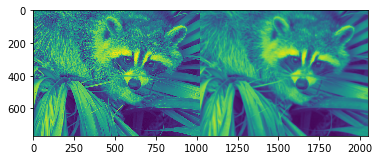

In [87]:
plt.imshow(np.hstack( (face, blurred_face)))


In [88]:
filter_blur = scipy.ndimage.gaussian_filter(blurred_face ,1)

In [89]:
sharpened = blurred_face + 1* ( -blurred_face + filter_blur)

In [90]:
a = np.hstack((sharpened , face))
plt.imsave('image.jpg' ,a)

<img src="image.jpg" width=900 heigth=900>